# Introduction to Python  

## Pandas - Exploratory Data Analysis (EDA) part 3

In [1]:
import os
import zipfile
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# Source: http://blog.districtdatalabs.com/data-exploration-with-python-1

In [2]:
datapath = '../Data/EDA/'
transform = 'sales_transactions.xlsx'
zipname = 'vehicles'

## Pandas with Machine Learning: Vehicles Database

The framework I came up with, pictured below, consists of a Prep Phase and an Explore Phase. Each phase has several steps in it that we will walk through together as we progress through this series.

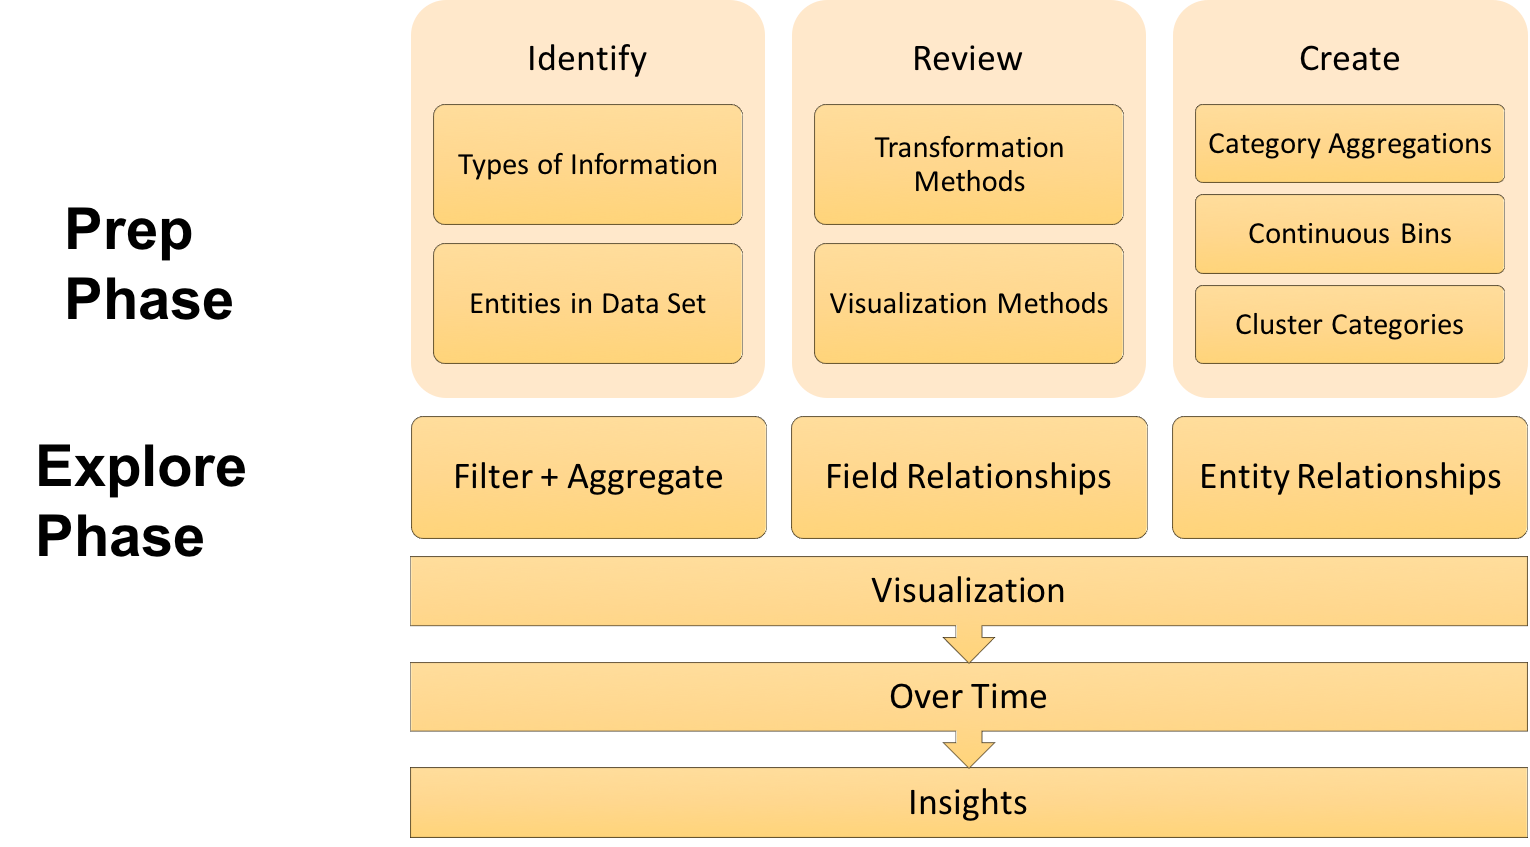

In [3]:
display(Image(os.path.join(datapath,'framework.png'), width=700))

In [4]:
with zipfile.ZipFile('{0}.zip'.format(os.path.join(datapath,zipname)), 'r') as myzip:
    with myzip.open('vehicles.csv') as myfile:
        df_vehicles = pd.read_csv(myfile)
        
df_vehicles.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
df_vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

We are going to clean it up by dropping columns we don't need, removing vehicles that are coming out in the future, removing any duplicate records, and then sorting the data by make, model, and year.

In [6]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass',
                  'fuelType','barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 
                  'fuelCost08']

df_vehicles = df_vehicles[select_columns][df_vehicles.year <= 2016].drop_duplicates().dropna()
df_vehicles = df_vehicles.sort_values(['make', 'model', 'year'])

#### Identify Stage

Now that we have a clean data set, let's jump into the framework, beginning with the Prep Phase. The first thing we're going to do is identify the types of information contained in our data set, which will help us get to know our data a bit better and prepare us to think about the data in different ways. After that, we will identify the entities in our data set so that we are aware of the different levels to which we can aggregate up or drill down.
Types of Information

There are a few distinct types of information that jump out at us just from taking a quick look at the data set.

    Vehicle attributes information
    Vehicle manufacturer information
    Engine information
    Fuel information (such as fuel efficiency, fuel type, and fuel cost)
    Transmission information
    Drive axle information

There are also some other types of information in our data that may not be as obvious. Since we have the year the vehicle was manufactured, we can observe changes in the data over time. We also have relationship information in the data, both between fields and between the entities. And since we have both a time variable as well as information about relationships, we can learn how those relationships have changed over time.

#### Entities in the Data

The next step in the Prep Phase is to identify the entities in our data. Now, what exactly do I mean by entities? When I refer to entities, I'm referring to the individual, analyzable units in a data set. To conduct any type of analysis, you need to be able to distinguish one entity from another and identify differences between them. Entities are also usually part of some hierarchical structure where they can be aggregated into one or more systems, or higher-level entities, to which they belong. Now that we have defined what an entity is, let's take a look at the different levels of them that are present in our data set.

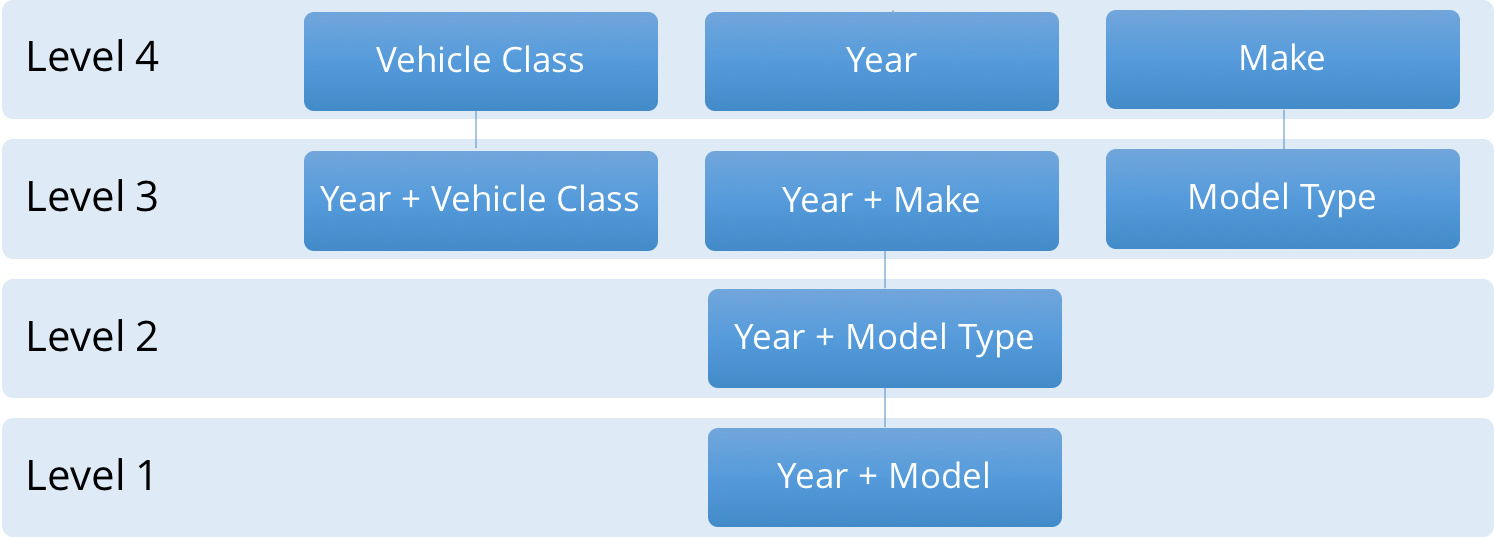

In [7]:
display(Image(os.path.join(datapath,'entities1.png'), width=1000))

Beginning at Level 1 (which is the most granular level in the data) - you can see the year and specific model of vehicle. The next level we can aggregate up to from there is year and model type, which is slightly less granular. From there, we have a few different directions we can pursue: year and vehicle class, year and make, or we can remove year and only keep model type. Finally, at Level 4, we can further aggregate the data to just the vehicle classes, the years, or the makes.

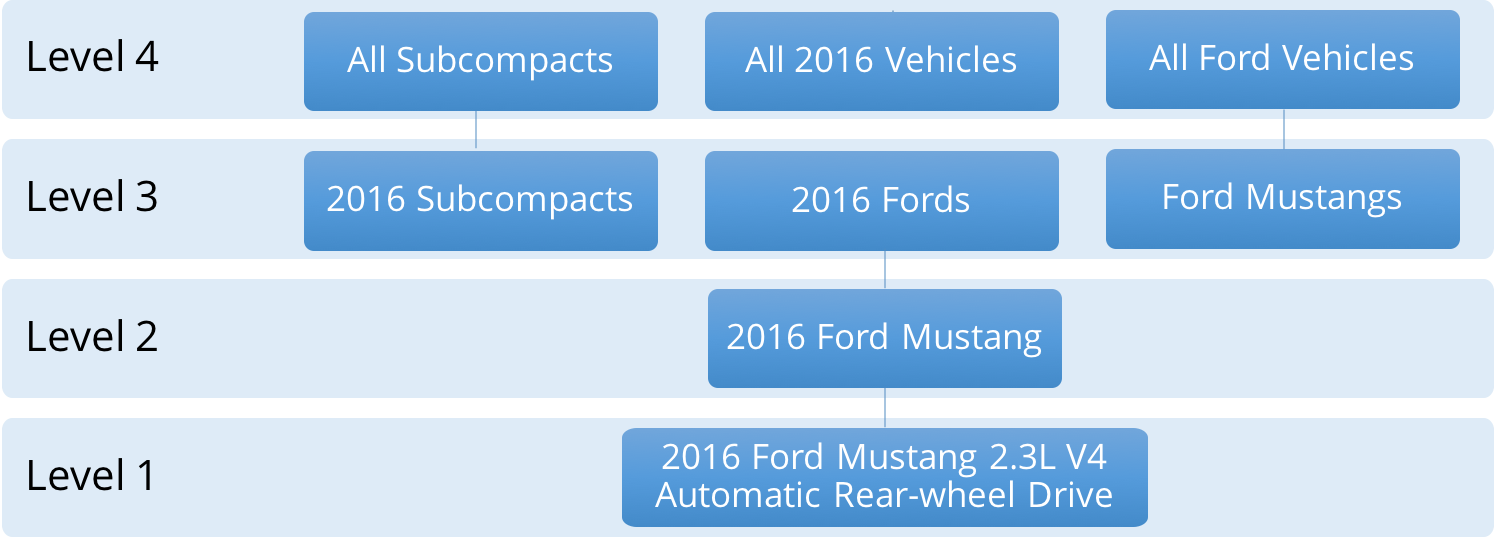

In [8]:
display(Image(os.path.join(datapath,'entities2.png'), width=1000))

At Level 1, which was the year and the model, we have a 2016 Ford Mustang with a 2.3 liter V4 engine, automatic transmission, and rear-wheel drive. At Level 2, we can roll things up and look at all 2016 Ford Mustangs as one entity that we're analyzing. Then at Level 3, we can either make our entities all 2016 Subcompact Cars, all 2016 Fords, or all Ford Mustangs regardless of the year they were manufactured. From there, we can continue going up the hierarchy.

Again, doing this is important, and it will help you think about all the things you can do to the data and all the different ways you can look at it later on. I see a lot of people that are new to data science who don't do this. They don't think about their data this way, and because of that, they end up missing valuable insights that they would have otherwise discovered. I hope that these examples help make it easier to think about data this way.

#### Review Stage

The next step in the Prep Phase is to review some transformation and visualization methods. Doing this will ensure that we are aware of the tools we have in our analytic arsenal, what they should be used for, and when to utilize each one.
Transformation Methods

The first methods we will cover are the transformation methods. Let's take a look at some of my favorite ways to transform data.

    Filtering
    Aggregation/Disaggregation
    Pivoting
    Graph Transformation

The first method I have listed here is Filtering, which is making the data set smaller by looking at either fewer rows, fewer columns, or both. The next method on the list is Aggregation/Disaggregation. This is the process of changing the levels at which you are analyzing the data, getting either more or less granular. Then we have Pivoting, which is the process of aggregating by multiple variables along two axes - the rows and the columns. Finally, we have Graph Transformation, which is the process of linking your entities based on shared attributes and examining how they relate to one another.

By transforming the data, you are ultimately altering its structure, which allows you to look at it from several perspectives. And just like looking at anything else from different perspectives, you will learn something new from each way that you view it. The remarkable thing about this is that the number of ways you can transform the data is limited only by your creativity and your imagination. This, for me, is one of the most exciting things about working with data - all the things you can do to it and all the creative ways that you can transform it.
Visualization Methods

In addition to transforming the data, I also like to go a step further and visualize it, as sometimes the transformations you perform can be difficult to interpret. Converting your transformations to visualizations allows you to bring the human visual cortex into your analytical process, and I often find that this helps me find more insights faster, since the visual component of it makes the insights jump right out at me.

Because of this, transformation and visualization go hand-in-hand. Since there are a variety of ways to transform data, there are also several ways you can visualize it. I like to keep things relatively simple, so here are some of the visualization methods I use most often.

    Bar charts
    Multi-line Graphs
    Scatter plots/matrices
    Heatmaps
    Network Visualizations

The first visualization method on the list is Bar charts, which help you intuitively view aggregations by comparing the size or magnitude of higher-level entities in the data. Bar charts are simple, but they can be very useful, which is why they are one of the most popular types of visualization methods. Next, we have Multi-line Graphs, which are usually used to show changes over time or some other measure, where each line typically represents a higher-level entity whose behavior you are comparing.

The third method on the list is a combination of Scatter Plots and Scatter Matrices. Using scatter plots, you can view relationships and correlations between two numeric variables in your data set at a time. Scatter matrices are simply a matrix of scatter plots, so they allow you to view the relationships and correlations between all your numeric variables in a single visualization.

The fourth visualization method listed are Heatmaps, which allow you to view the concentration, magnitude, or other calculated value of entities that fall into different combinations of categories in your data. Last, but certainly not least, we have Network Visualizations, which bring graph transformations to life and let you visualize relationships between the entities in your data via a collection of visual nodes and edges.

#### Renaming Collumns

In [9]:
df_vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                       'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                       'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                       'CO2 Emission Grams/Mile','Fuel Cost/Year']

#### Thinking About Categorization

Now that we have changed our column names to be more intuitive, let's take a moment to think about what categorization is and examine the categories that currently exist in our data set. At the most basic level, categorization is just a way that humans structure information — how we hierarchically create order out of complexity. Categories are formed based on attributes that entities have in common, and they present us with different perspectives from which we can view and think about our data.

Our primary objective in this stage is to create additional categories that will help us further organize our data. This will prove beneficial not only for the exploratory analysis we will conduct but also for any supervised machine learning or modeling that may happen further down the data science pipeline. Seasoned data scientists know that the better your data is organized, the better downstream analyses you will be able to perform and the more informative features you will have to feed into your machine learning models.

In this stage of the framework, we are going to create additional categories in 3 distinct ways:

    Category Aggregations
    Binning Continuous Variables
    Clustering

Now that we have a better idea of what we are doing and why, let's get started.
Aggregating to Higher-Level Categories

The first way we are going to create additional categories is by identifying opportunities to create higher-level categories out of the variables we already have in our data set. In order to do this, we need to get a sense of what categories currently exist in the data. We can do this by iterating through our columns and printing out the name, the number of unique values, and the data type for each.

In [10]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 19316 to 29609
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35095 non-null  object 
 1   Model                    35095 non-null  object 
 2   Year                     35095 non-null  int64  
 3   Engine Displacement      35095 non-null  float64
 4   Cylinders                35095 non-null  float64
 5   Transmission             35095 non-null  object 
 6   Drivetrain               35095 non-null  object 
 7   Vehicle Class            35095 non-null  object 
 8   Fuel Type                35095 non-null  object 
 9   Fuel Barrels/Year        35095 non-null  float64
 10  City MPG                 35095 non-null  int64  
 11  Highway MPG              35095 non-null  int64  
 12  Combined MPG             35095 non-null  int64  
 13  CO2 Emission Grams/Mile  35095 non-null  float64
 14  Fuel Cost/Year    

In [11]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(df_vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


From looking at the output, it is clear that we have some numeric columns (int64 and float64) and some categorical columns (object). For now, let's focus on the six categorical columns in our data set.

    Make: 126 unique values
    Model: 3,491 unique values
    Transmission: 43 unique values
    Drivetrain: 7 unique values
    Vehicle Class: 34 unique values
    Fuel Type: 13 unique values

When aggregating and summarizing data, having too many categories can be problematic. The average human is said to have the ability to hold 7 objects at a time in their short-term working memory. Accordingly, I have noticed that once you exceed 8-10 discrete values in a category, it becomes increasingly difficult to get a holistic picture of how the entire data set is divided up.

What we want to do is examine the values in each of our categorical variables to determine where opportunities exist to aggregate them into higher-level categories. The way this is typically done is by using a combination of clues from the current categories and any domain knowledge you may have (or be able to acquire).

For example, imagine aggregating by Transmission, which has 43 discrete values in our data set. It is going to be difficult to derive insights due to the fact that any aggregated metrics are going to be distributed across more categories than you can hold in short-term memory. However, if we examine the different transmission categories with the goal of finding common features that we can group on, we would find that all 43 values fall into one of two transmission types, Automatic or Manual.

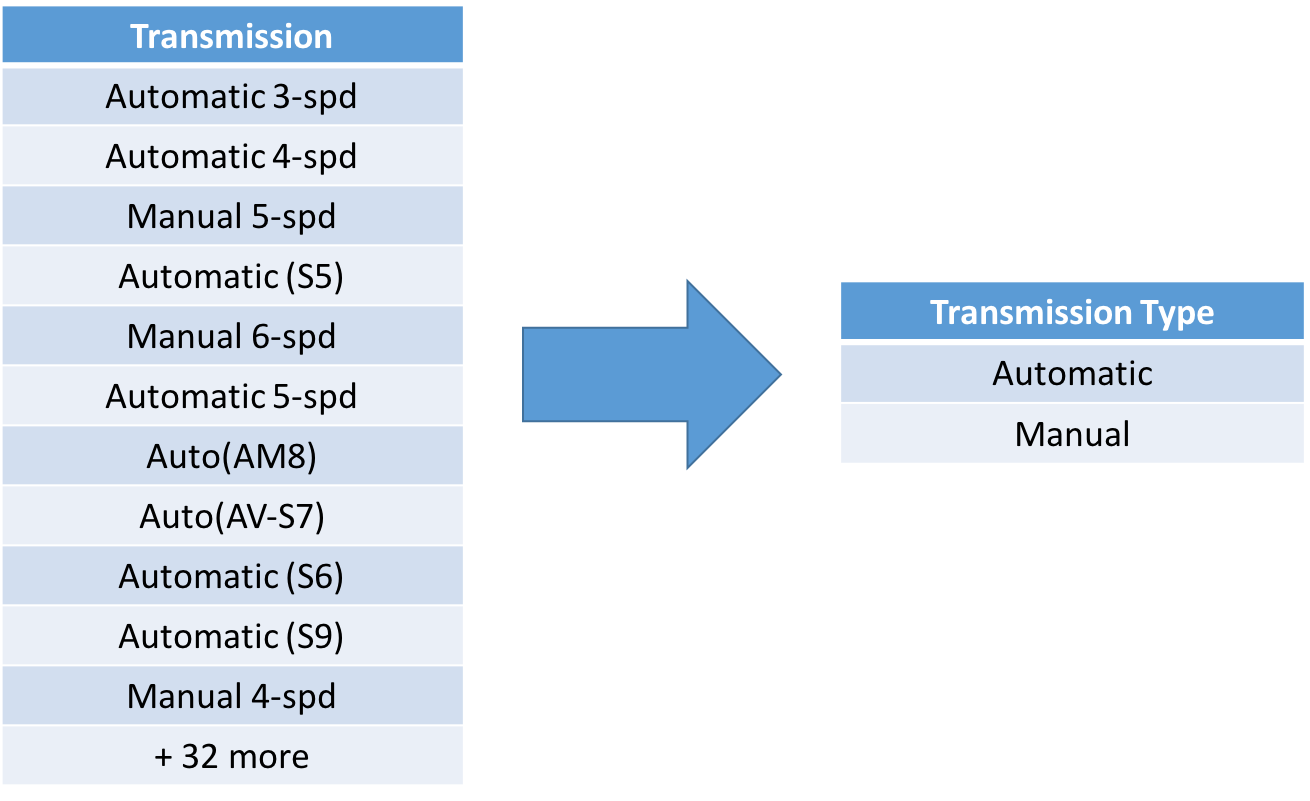

In [12]:
display(Image(os.path.join(datapath,'transmission.png'), width=1000))

Let's create a new Transmission Type column in our data frame and, with the help of the loc method in pandas, assign it a value of Automatic where the first character of Transmission is the letter A and a value of Manual where the first character is the letter M.

In [13]:
df_vehicles.loc[df_vehicles['Transmission'].str.startswith('A'), 'Transmission Type'] = "Automatic"
df_vehicles.loc[df_vehicles['Transmission'].str.startswith('M'), 'Transmission Type'] = "Manual"

We can apply the same logic to the Vehicle Class field. We originally have 34 vehicle classes, but we can distill those down into 8 vehicle categories, which are much easier to remember.

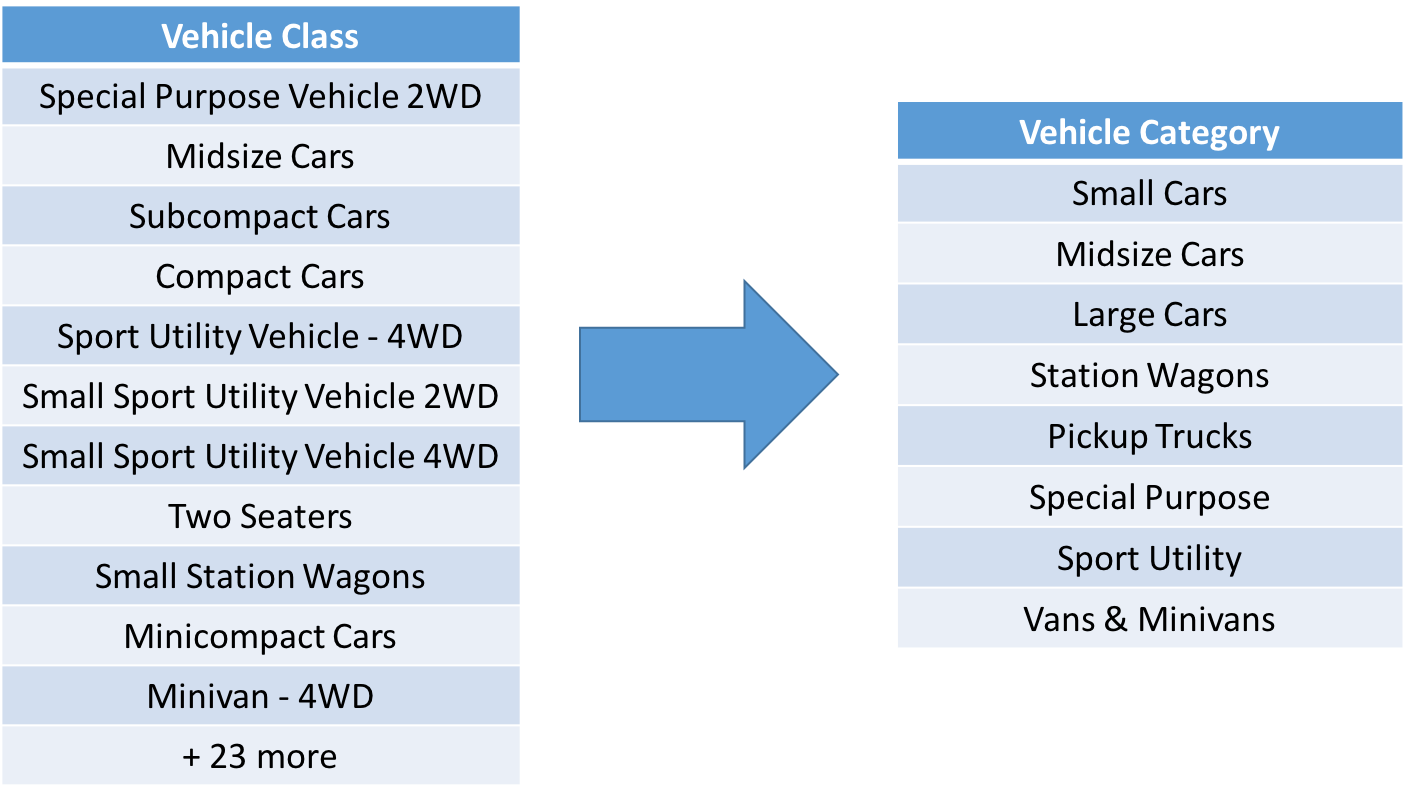

In [14]:
display(Image(os.path.join(datapath,'vehicle_class.png'), width=1000))

In [15]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

df_vehicles.loc[df_vehicles['Vehicle Class'].isin(small), 'Vehicle Category'] = 'Small Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].isin(midsize), 'Vehicle Category'] = 'Midsize Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].isin(large), 'Vehicle Category'] = 'Large Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Station'), 'Vehicle Category'] = 'Station Wagons'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Truck'), 'Vehicle Category'] = 'Pickup Trucks'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Special Purpose'), 'Vehicle Category'] = 'Special Purpose'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Sport Utility'), 'Vehicle Category'] = 'Sport Utility'
df_vehicles.loc[(df_vehicles['Vehicle Class'].str.lower().str.contains('van')), 'Vehicle Category'] = 'Vans & Minivans'

Next, let's look at the Make and Model fields, which have 126 and 3,491 unique values respectively. While I can't think of a way to get either of those down to 8-10 categories, we can create another potentially informative field by concatenating Make and the first word of the Model field together into a new Model Type field. This would allow us to, for example, categorize all Chevrolet Suburban C1500 2WD vehicles and all Chevrolet Suburban K1500 4WD vehicles as simply Chevrolet Suburbans.

In [16]:
df_vehicles['Model Type'] = (df_vehicles['Make'] + " " + df_vehicles['Model'].str.split().str.get(0))

Finally, let's look at the Fuel Type field, which has 13 unique values. On the surface, that doesn't seem too bad, but upon further inspection, you'll notice some complexity embedded in the categories that could probably be organized more intuitively.

In [17]:
df_vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

This is interesting and a little tricky because there are some categories that contain a single fuel type and others that contain multiple fuel types. In order to organize this better, we will create two sets of categories from these fuel types. The first will be a set of columns that will be able to represent the different combinations, while still preserving the individual fuel types.

In [18]:
df_vehicles['Gas'] = 0
df_vehicles['Ethanol'] = 0
df_vehicles['Electric'] = 0
df_vehicles['Propane'] = 0
df_vehicles['Natural Gas'] = 0

df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

As it turns out, 99% of the vehicles in our database have gas as a fuel type, either by itself or combined with another fuel type. Since that is the case, let's create a second set of categories - specifically, a new Gas Type field that extracts the type of gas (Regular, Midgrade, Premium, Diesel, or Natural) each vehicle accepts.

In [19]:
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Regular|Gasoline'),'Gas Type'] = 'Regular'
df_vehicles.loc[df_vehicles['Fuel Type'] == 'Midgrade','Gas Type'] = 'Midgrade'
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Premium'),'Gas Type'] = 'Premium'
df_vehicles.loc[df_vehicles['Fuel Type'] == 'Diesel','Gas Type'] = 'Diesel'
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('natural|CNG'),'Gas Type'] = 'Natural'

An important thing to note about what we have done with all of the categorical fields in this section is that, while we created new categories, we did not overwrite the original ones. We created additional fields that will allow us to view the information contained within the data set at different (often higher) levels. If you need to drill down to the more granular original categories, you can always do that. However, now we have a choice whereas before we performed these category aggregations, we did not.

#### Creating Categories from Continuous Variables

The next way we can create additional categories in our data is by binning some of our continuous variables - breaking them up into different categories based on a threshold or distribution. There are multiple ways you can do this, but I like to use quintiles because it gives me one middle category, two categories outside of that which are moderately higher and lower, and then two extreme categories at the ends. I find that this is a very intuitive way to break things up and provides some consistency across categories. In our data set, I've identified 4 fields that we can bin this way.

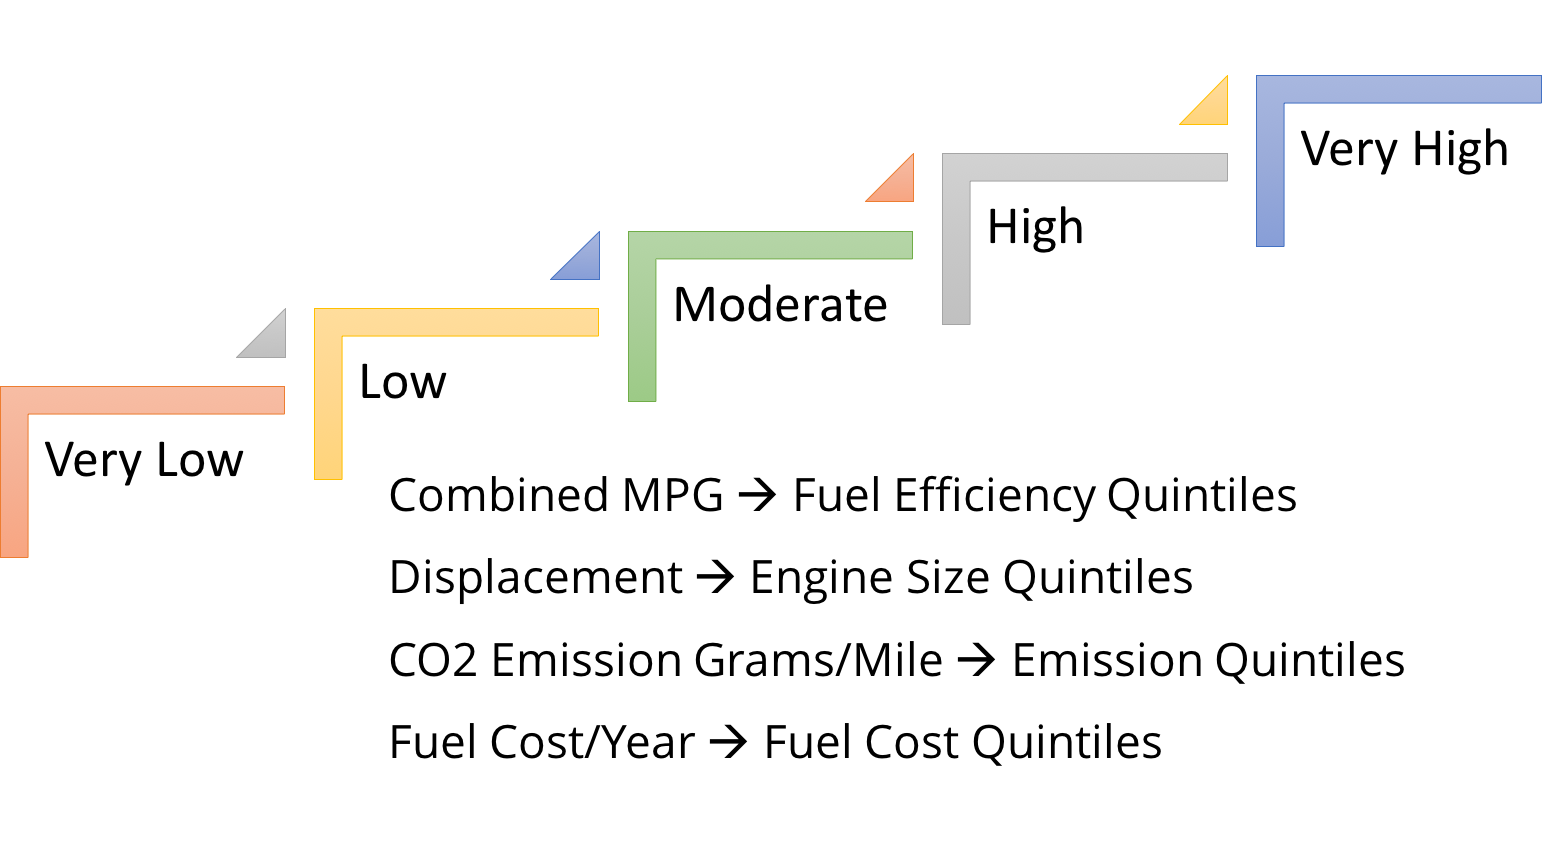

In [20]:
display(Image(os.path.join(datapath,'binning.png'), width=800))

Binning essentially looks at how the data is distributed, creates the necessary number of bins by splitting up the range of values (either equally or based on explicit boundaries), and then categorizes records into the appropriate bin that their continuous value falls into. Pandas has a qcut method that makes binning extremely easy, so let's use that to create our quintiles for each of the continuous variables we identified.

In [21]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency','Moderate Efficiency',
                         'High Efficiency','Very High Efficiency']
df_vehicles['Fuel Efficiency'] = pd.qcut(df_vehicles['Combined MPG'], 5, efficiency_categories)


engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine', 'Large Engine', 'Very Large Engine']
df_vehicles['Engine Size'] = pd.qcut(df_vehicles['Engine Displacement'], 5, engine_categories)


emission_categories = ['Very Low Emissions', 'Low Emissions', 'Moderate Emissions',
                       'High Emissions', 'Very High Emissions']
df_vehicles['Emissions'] = pd.qcut(df_vehicles['CO2 Emission Grams/Mile'], 5, emission_categories)


fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost', 'Moderate Fuel Cost',
                       'High Fuel Cost','Very High Fuel Cost']
df_vehicles['Fuel Cost'] = pd.qcut(df_vehicles['Fuel Cost/Year'], 5, fuelcost_categories)

#### Clustering to Create Additional Categories

The final way we are going to prepare our data is by clustering to create additional categories. There are a few reasons why I like to use clustering for this. First, it takes multiple fields into consideration together at the same time, whereas the other categorization methods only consider one field at a time. This will allow you to categorize together entities that are similar across a variety of attributes, but might not be close enough in each individual attribute to get grouped together.

Clustering also creates new categories for you automatically, which takes much less time than having to comb through the data yourself identifying patterns across attributes that you can form categories on. It will automatically group similar items together for you.

The third reason I like to use clustering is because it will sometimes group things in ways that you, as a human, may not have thought of. I'm a big fan of humans and machines working together to optimize analytical processes, and this is a good example of value that machines bring to the table that can be helpful to humans. I'll write more about my thoughts on that in future posts, but for now, let's move on to clustering our data.

The first thing we are going to do is isolate the columns we want to use for clustering. These are going to be columns with numeric values, as the clustering algorithm will need to compute distances in order to group similar vehicles together.

In [22]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year', 'City MPG','Highway MPG',
                   'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Next, we want to scale the features we are going to cluster on. There are a variety of ways to normalize and scale variables, but I'm going to keep things relatively simple and just use Scikit-Learn's MaxAbsScaler, which will divide each value by the max absolute value for that feature. This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1 (technically -1 and 1, but we don't have any negatives).

In [23]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

df_vehicle_clusters = scaler.fit_transform(df_vehicles[cluster_columns])
df_vehicle_clusters = pd.DataFrame(df_vehicle_clusters, columns=cluster_columns)

Now that our features are scaled, let's write a couple of functions. The first function we are going to write is a kmeans_cluster function that will k-means cluster a given data frame into a specified number of clusters. It will then return a copy of the original data frame with those clusters appended in a column named Cluster.

In [24]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

Our second function, called summarize_clustering is going to count the number of vehicles that fall into each cluster and calculate the cluster means for each feature. It is going to merge the counts and means into a single data frame and then return that summary to us.

In [25]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

We now have functions for what we need to do, so the next step is to actually cluster our data. But wait, our kmeans_cluster function is supposed to accept a number of clusters. How do we determine how many clusters we want?

There are a number of approaches for figuring this out, but for the sake of simplicity, we are just going to plug in a couple of numbers and visualize the results to arrive at a good enough estimate. Remember earlier in this post where we were trying to aggregate our categorical variables to less than 8-10 discrete values? We are going to apply the same logic here. Let's start out with 8 clusters and see what kind of results we get.

In [26]:
cluster_results = kmeans_cluster(df_vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)

In [27]:
cluster_summary.head(10)

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
1,1,4780,0.447330,0.373392,0.437782,0.249578,0.310182,0.287242,0.437757,0.371065
2,2,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
3,3,2914,0.595544,0.500214,0.395693,0.262833,0.360881,0.315656,0.400243,0.364243
4,4,3983,0.632127,0.501946,0.495468,0.218298,0.281866,0.255416,0.495648,0.422877
5,5,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
6,6,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153
7,7,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951


By looking at the Count column, you can tell that there are some clusters that have significantly more records in them (ex. Cluster 7) and others that have significantly fewer (ex. Cluster 3). Other than that, though, it is difficult to notice anything informative about the summary. I don't know about you, but to me, the rest of the summary just looks like a bunch of decimals in a table.

This is a prime opportunity to use a visualization to discover insights faster. With just a couple import statements and a single line of code, we can light this summary up in a heatmap so that we can see the contrast between all those decimals and between the different clusters.

<AxesSubplot:>

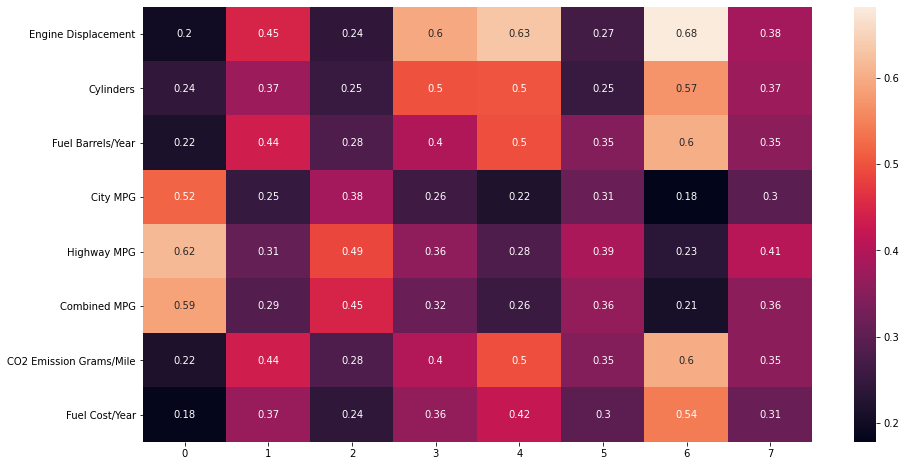

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

In this heatmap, the rows represent the features and the columns represent the clusters, so we can compare how similar or differently columns look to each other. Our goal for clustering these features is to ultimately create meaningful categories out of the clusters, so we want to get to the point where we can clearly distinguish one from the others. This heatmap allows us to do this quickly and visually.

With this goal in mind, it is apparent that we probably have too many clusters because:

    Clusters 3, 4, and 7 look pretty similar
    Clusters 2 and 5 look similar as well
    Clusters 0 and 6 are also a little close for comfort

From the way our heatmap currently looks, I'm willing to bet that we can cut the number of clusters in half and get clearer boundaries. Let's re-run the clustering, summary, and heatmap code for 4 clusters and see what kind of results we get.

<AxesSubplot:>

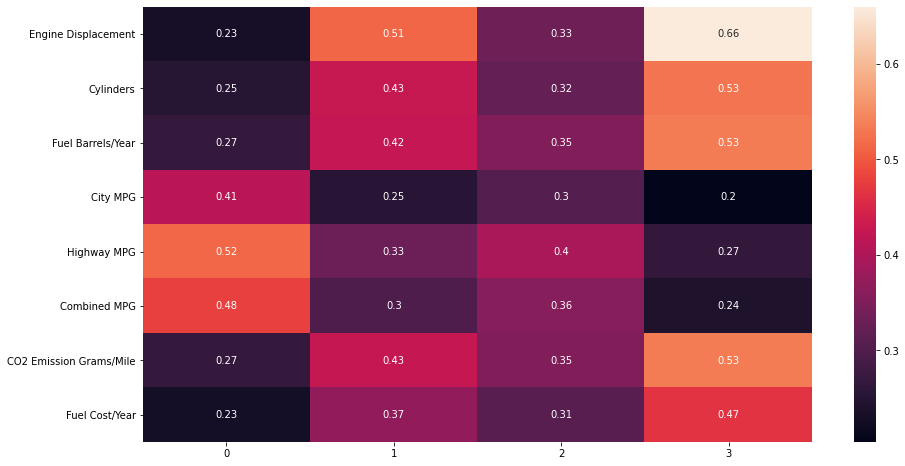

In [29]:
cluster_results = kmeans_cluster(df_vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

These clusters look more distinct, don't they? Clusters 1 and 3 look like they are polar opposites of each other, cluster 0 looks like it’s pretty well balanced across all the features, and cluster 2 looks like it’s about half-way between Cluster 0 and Cluster 1.

We now have a good number of clusters, but we still have a problem. It is difficult to remember what clusters 0, 1, 2, and 3 mean, so as a next step, I like to assign descriptive names to the clusters based on their properties. In order to do this, we need to look at the levels of each feature for each cluster and come up with intuitive natural language descriptions for them. You can have some fun and can get as creative as you want here, but just keep in mind that the objective is for you to be able to remember the characteristics of whatever label you assign to the clusters.

    Cluster 1 vehicles seem to have large engines that consume a lot of fuel, process it inefficiently, produce a lot of emissions, and cost a lot to fill up. I'm going to label them Large Inefficient.
    Cluster 3 vehicles have small, fuel efficient engines that don't produce a lot of emissions and are relatively inexpensive to fill up. I'm going to label them Small Very Efficient.
    Cluster 0 vehicles are fairly balanced across every category, so I'm going to label them Midsized Balanced.
    Cluster 2 vehicles have large engines but are more moderately efficient than the vehicles in Cluster 1, so I'm going to label them Large Moderately Efficient.

Now that we have come up with these descriptive names for our clusters, let's add a Cluster Name column to our cluster_results data frame, and then copy the cluster names over to our original vehicles data frame.



In [30]:
cluster_results.loc['Cluster Name'] = ''
cluster_results.loc[cluster_results['Cluster'] == 0,'Cluster Name'] = 'Midsized Balanced'
cluster_results.loc[cluster_results['Cluster'] == 1,'Cluster Name'] = 'Large Inefficient'
cluster_results.loc[cluster_results['Cluster'] == 2,'Cluster Name'] = 'Large Moderately Efficient'
cluster_results.loc[cluster_results['Cluster'] == 3,'Cluster Name'] = 'Small Very Efficient'

df_vehicles = df_vehicles.reset_index().drop('index', axis=1)
df_vehicles['Cluster Name'] = cluster_results['Cluster Name']

We will begin with the cleaned and prepped vehicle fuel economy data set that we ended up with at the end of the last post. This version of the data set contains:

    The higher-level categories we created via category aggregations.
    The quintiles we created by binning our continuous variables.
    The clusters we generated via k-means clustering based on numeric variables.

Now, without further ado, let's embark on our insight-finding mission!

#### Making Our Data Smaller: Filter + Aggregate

One of the fundamental ways to extract insights from a data set is to reduce the size of the data so that you can look at just a piece of it at a time. There are two ways to do this: filtering and aggregating. With filtering, you are essentially removing either rows or columns (or both rows and columns) in order to focus on a subset of the data that interests you. With aggregation, the objective is to group records in your data set that have similar categorical attributes and then perform some calculation (count, sum, mean, etc.) on one or more numerical fields so that you can observe and identify differences between records that fall into each group.

To begin filtering and aggregating our data set, we could write a function like the one below to aggregate based on a group_field that we provide, counting the number of rows in each group. To make things more intuitive and easier to interpret, we will also sort the data from most frequent to least and format it in a pandas data frame with appropriate column names. 

In [31]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped = pd.DataFrame(grouped).reset_index(drop=True)
    grouped.columns = [group_field, 'Count']
    grouped.sort_values(by='Count', ascending=False, inplace=True)
    return grouped

Now that we have this function in our toolkit, let's use it. Suppose we were looking at the Vehicle Category field in our data set and were curious about the number of vehicles in each category that were manufactured last year (2016). Here is how we would filter the data and use the agg_count function to transform it to show what we wanted to know. 

In [32]:
vehicles_2016 = df_vehicles[df_vehicles['Year'] == 2016]
category_counts = agg_count(vehicles_2016, 'Vehicle Category')
category_counts.head(8)

,Vehicle Category,Count
3,Small Cars,440
5,Sport Utility,319
1,Midsize Cars,201
0,Large Cars,100
2,Pickup Trucks,83
6,Station Wagons,44
4,Special Purpose,24
7,Vans & Minivans,17


#### Filter Aggregate Count

This gives us what we want in tabular form, but we could take it a step further and visualize it with a horizontal bar chart. 

Text(0.5, 1.0, 'Vehicles Manufactured by Category (2016) \n')

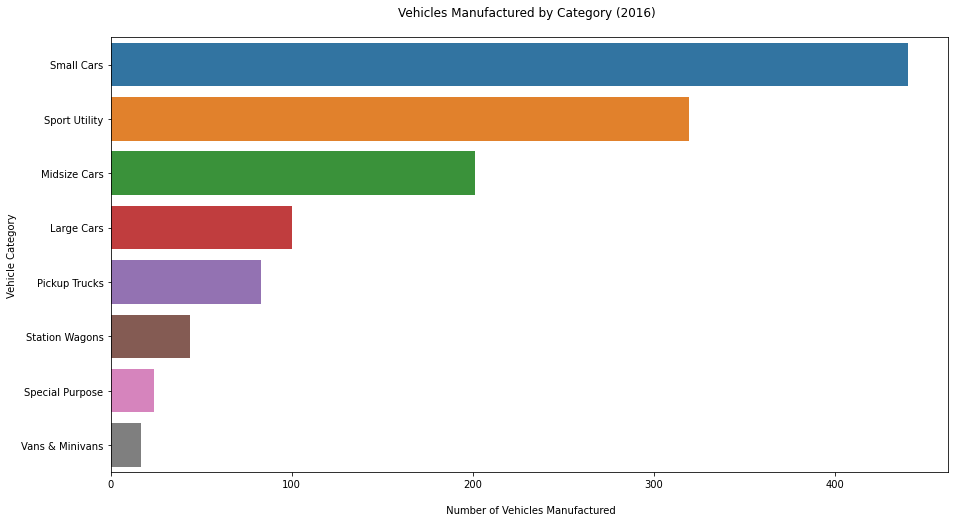

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (2016) \n')

Now that we know how to do this, we can filter, aggregate, and plot just about anything in our data set with just a few lines of code. For example, here is the same metric but filtered for a different year (1985). 

Text(0.5, 1.0, 'Vehicles Manufactured by Category (1985) \n')

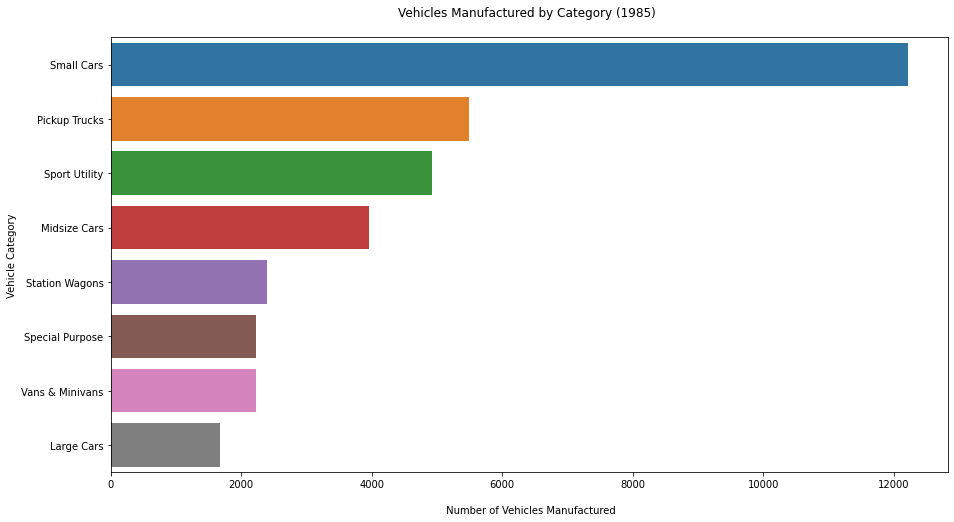

In [34]:
vehicles_1985 = df_vehicles[df_vehicles['Year']==1985]
category_counts = agg_count(df_vehicles, 'Vehicle Category')

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (1985) \n')

If we wanted to stick with the year 2016 but drill down to the more granular Vehicle Class, we could do that as well. 

Text(0.5, 1.0, 'Vehicles Manufactured by Class (2016) \n')

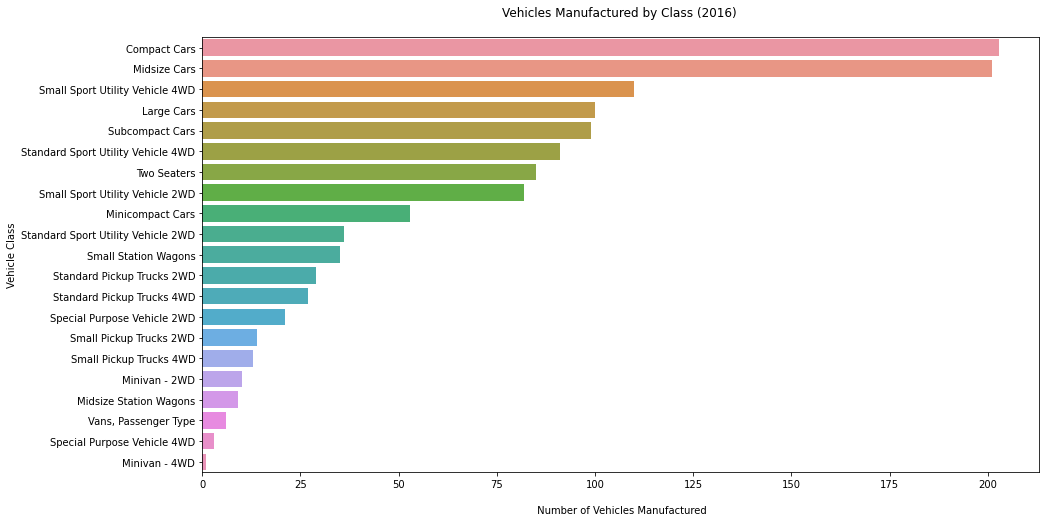

In [35]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Class (2016) \n')

We could also look at vehicle counts by manufacturer. 

Text(0.5, 1.0, 'Vehicles Manufactured by Make (2016) \n')

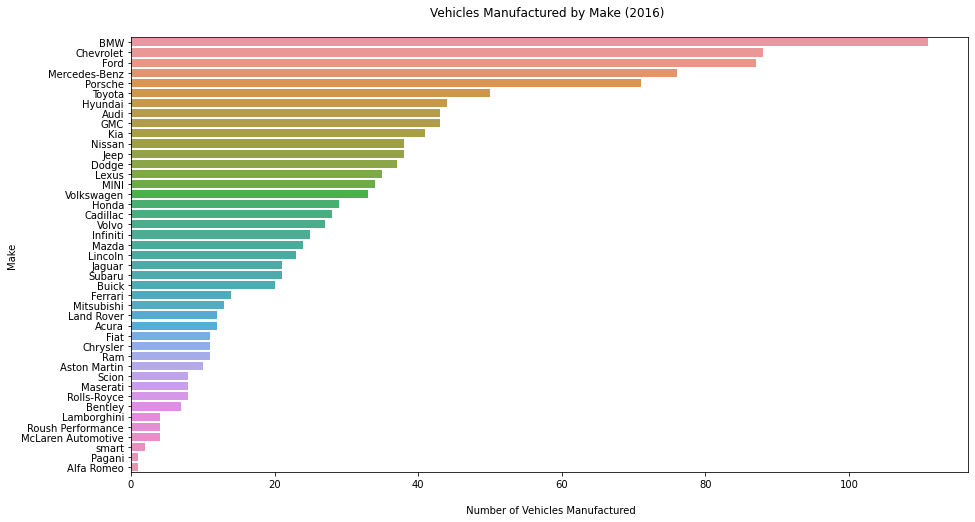

In [36]:
make_counts = agg_count(vehicles_2016, 'Make')

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Make (2016) \n')

What if we wanted to filter by something other than the year? We could do that by simply creating a different filtered data frame and passing that to our agg_count function. Below, instead of filtering by Year, I've filtered on the Fuel Efficiency field, which contains the fuel efficiency quintiles we generated in the last post. Let's choose the Very High Efficiency value so that we can see how many very efficient vehicles each manufacturer has made. 

Text(0.5, 1.0, 'Very Fuel Efficient Vehicles by Make \n')

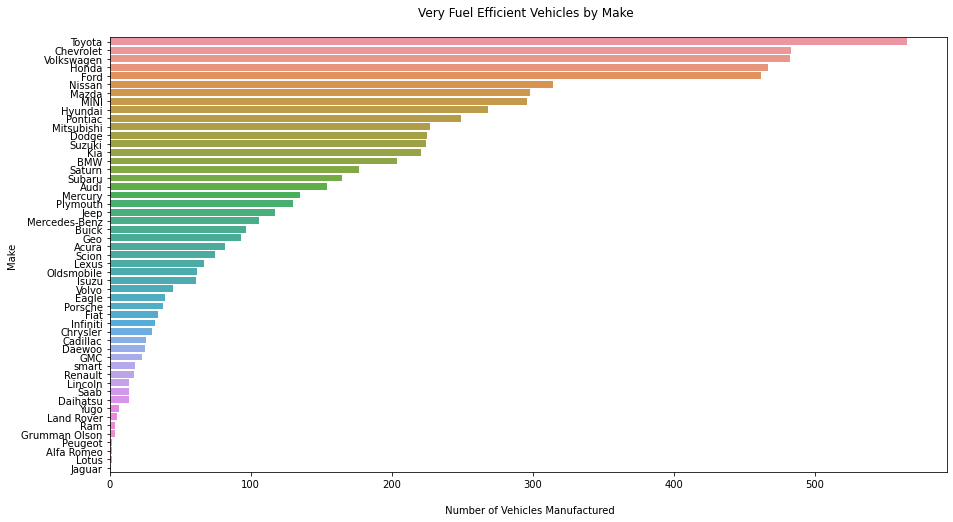

In [37]:
very_efficient = df_vehicles[df_vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Very Fuel Efficient Vehicles by Make \n')

What if we wanted to perform some other calculation, such as averaging, instead of counting the number of records that fall into each group? We can just create a new function called agg_avg that calculates the mean of a designated numerical field.

In [38]:
def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    grouped = grouped.sort_values(by=calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    return grouped

We can then simply swap out the agg_count function with our new agg_avg function and indicate what field we would like to use for our calculation. Below is an example showing the average fuel efficiency, represented by the Combined MPG field, by vehicle category. 

Text(0.5, 1.0, 'Average Combined MPG by Category (2016) \n')

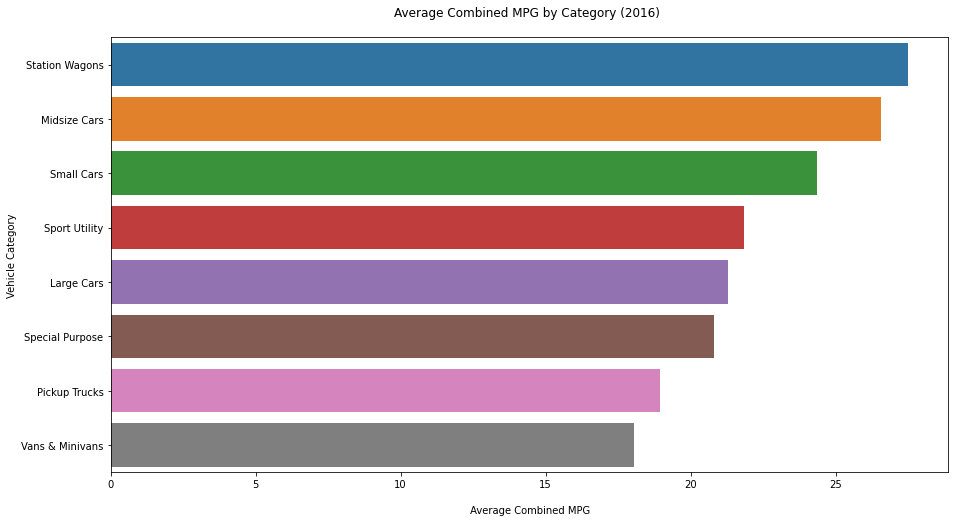

In [39]:
category_avg_mpg = agg_avg(vehicles_2016, 'Vehicle Category', 'Combined MPG')

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(data=category_avg_mpg, x='Avg Combined MPG', y='Vehicle Category')
ax.set(xlabel='\n Average Combined MPG')
plt.title('Average Combined MPG by Category (2016) \n')

#### Pivoting the Data for More Detail

Up until this point, we've been looking at our data at a pretty high level, aggregating up by a single variable. Sure, we were able to drill down from Vehicle Category to Vehicle Class to get a more granular view, but we only looked at the data one hierarchical level at a time. Next, we're going to go into further detail by taking a look at two or three variables at a time. The way we are going to do this is via pivot tables and their visual equivalents, pivot heatmaps.

First, we will create a pivot_count function, similar to the agg_count function we created earlier, that will transform whatever data frame we feed it into a pivot table with the rows, columns, and calculated field we specify. 

In [40]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

We will then use this function on our vehicles_2016 data frame and pivot it out with the Fuel Efficiency quintiles we created in the last post representing the rows, the Engine Size quintiles representing the columns, and then counting the number of vehicles that had a Combined MPG value. 

In [41]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency','Engine Size','Combined MPG')
effic_size_pivot.head(10)

Engine Size,Very Small Engine,Small Engine,Moderate Engine,Large Engine,Very Large Engine
Fuel Efficiency,,,,,
Very Low Efficiency,NaN,NaN,4.0,23.0,72.0
Low Efficiency,NaN,NaN,18.0,49.0,81.0
Moderate Efficiency,NaN,2.0,62.0,76.0,21.0
High Efficiency,33.0,42.0,135.0,67.0,2.0
Very High Efficiency,373.0,97.0,69.0,2.0,NaN


This is OK, but it would be faster to analyze visually. Let's create a heatmap that will color the magnitude of the counts and present us with a more intuitive view. 

Text(0.5, 1.0, 'Fuel Efficiency vs. Engine Size (2016) \n')

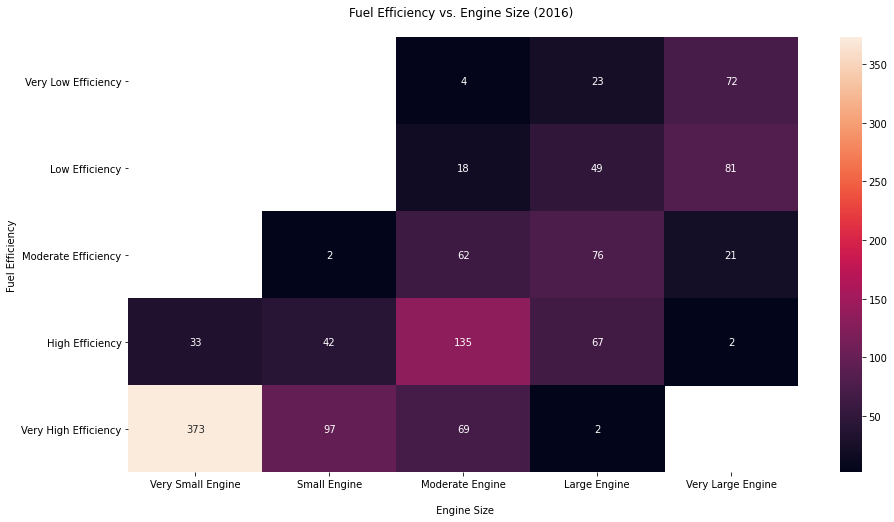

In [42]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (2016) \n')

Just like we did earlier with our horizontal bar charts, we can easily filter by a different year and get a different perspective. For example, here's what this heatmap looks like for 1985.

Text(0.5, 1.0, 'Fuel Efficiency vs. Engine Size (1985) \n')

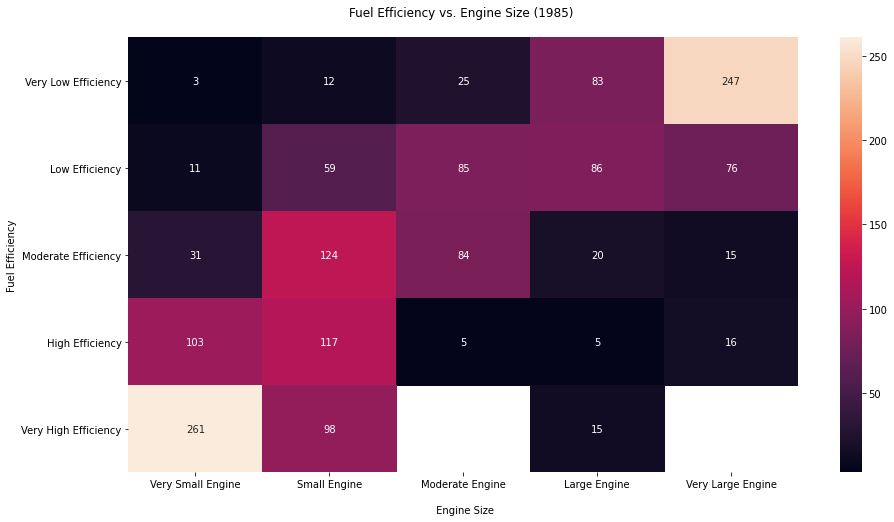

In [43]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency',
                               'Engine Size','Combined MPG')

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
plt.title('Fuel Efficiency vs. Engine Size (1985) \n')

With these pivot heatmaps, we are not limited to just two variables. We can pass a list of variables for any of the axes (rows or columns), and it will display all the different combinations of values for those variables. 

Text(0.5, 1.0, 'Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

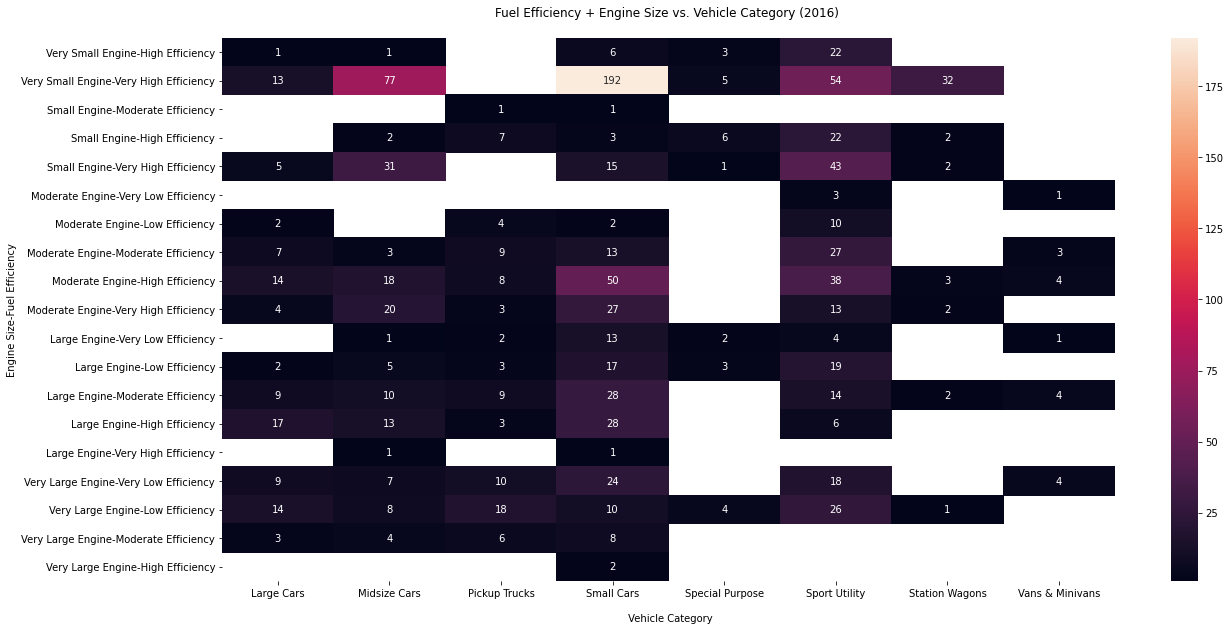

In [44]:
effic_size_category = pivot_count(vehicles_2016,
                                  ['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
plt.title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n')

In this heatmap, we have Engine Size and Fuel Efficiency combinations represented by the rows, and we've added a third variable (the Vehicle Category) across the columns. So now we can see a finer level of detail about what types of cars had what size engines and what level of fuel efficiency last year.

As a final example for this section, let's create a pivot heatmap that plots Make against Vehicle Category for 2016. We saw earlier, in the bar chart that counted vehicles by manufacturer, that BMW made the largest number of specific models last year. This pivot heatmap will let us see how those counts are distributed across vehicle categories, giving us a better sense of each auto company's current offerings in terms of the breadth vs. depth of vehicle types they make.

Text(0.5, 1.0, 'Make vs. Vehicle Category (2016) \n')

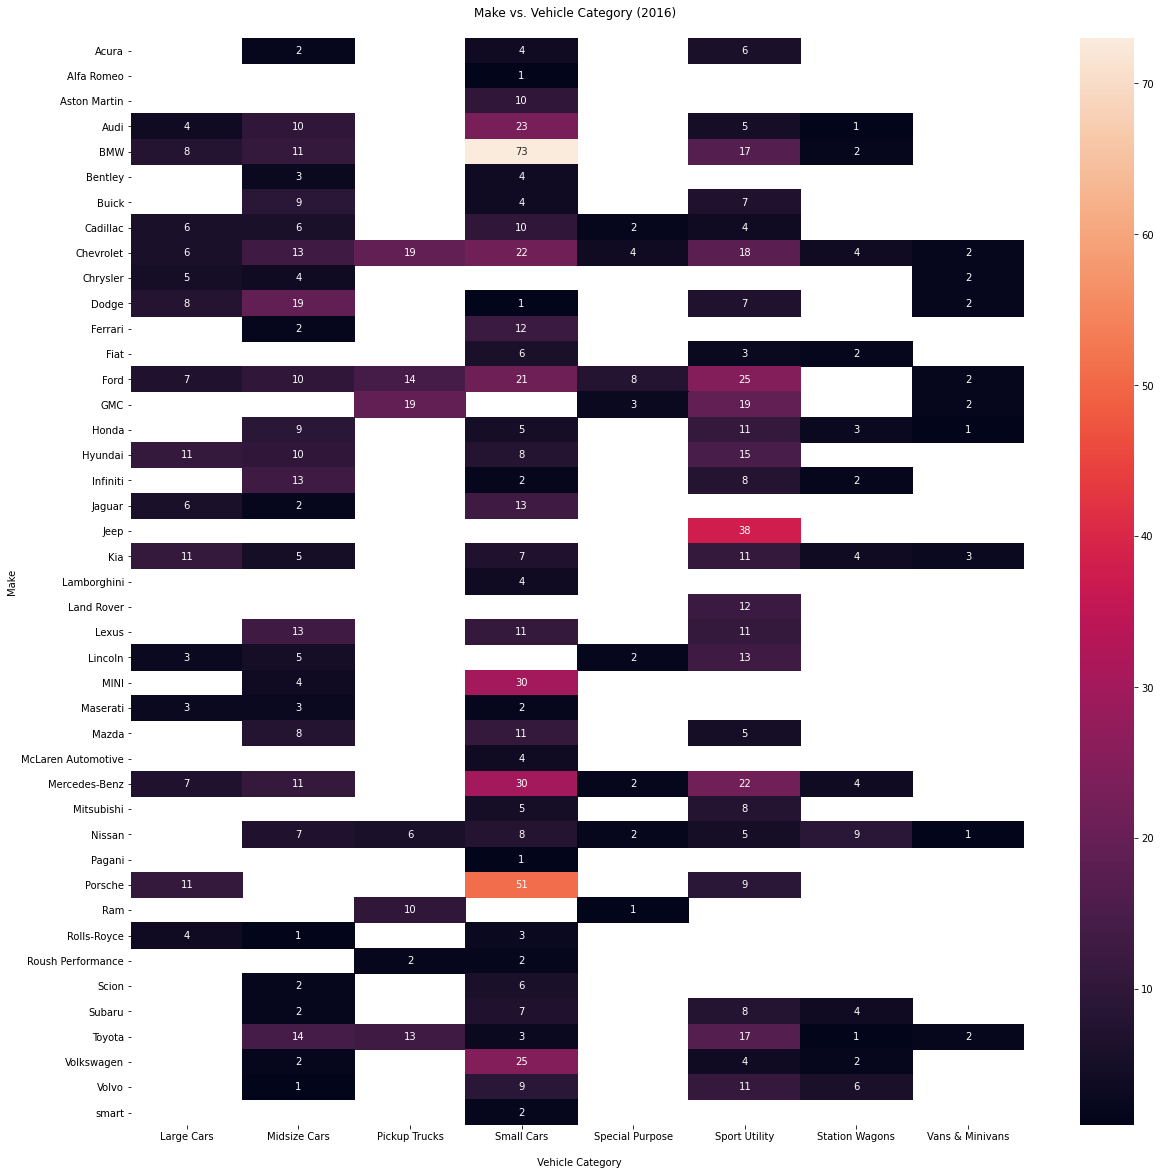

In [45]:
effic_size_pivot = pivot_count(vehicles_2016, 'Make', 'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
plt.title('Make vs. Vehicle Category (2016) \n')

#### Visualizing Changes Over Time

So far in this post, we've been looking at the data at given points in time. The next step is to take a look at how the data has changed over time. We can do this relatively easily by creating a multi_line function that accepts a data frame and x/y fields and then plots them on a multiline chart. 

In [46]:
def multi_line(df, x, y):
    ax = df.groupby([x, y]).size().unstack(y).plot(figsize=(15,8), cmap="Set2")

Let's use this function to visualize our vehicle categories over time. The resulting chart shows the number of vehicles in each category that were manufactured each year. 

Text(0.5, 1.0, 'Vehicle Categories Over Time \n')

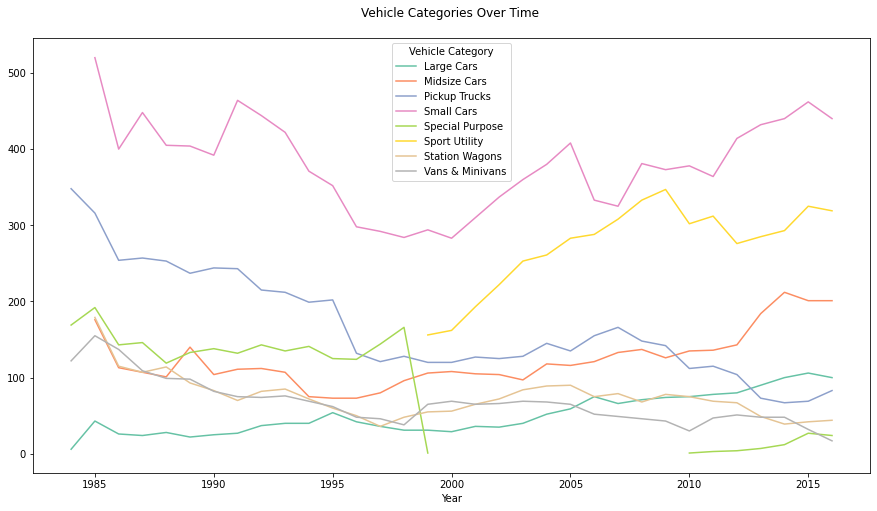

In [47]:
multi_line(df_vehicles, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('Vehicle Categories Over Time \n')

We can see from the chart that Small Cars have generally dominated across the board and that there was a small decline in the late 90s that then started to pick up again in the early 2000s. We can also see the introduction and increase in popularity of SUVs starting in the late 90s, and the decline in popularity of trucks in recent years.

If we wanted to, we could zoom in and filter for specific manufacturers to see how their offerings have changed over the years. Since BMW had the most number of vehicles last year and we saw in the pivot heatmap that those were mostly small cars, let's filter for just their vehicles to see whether they have always made a lot of small cars or if this is more of a recent phenomenon. 

Text(0.5, 1.0, 'BMW Vehicle Categories Over Time \n')

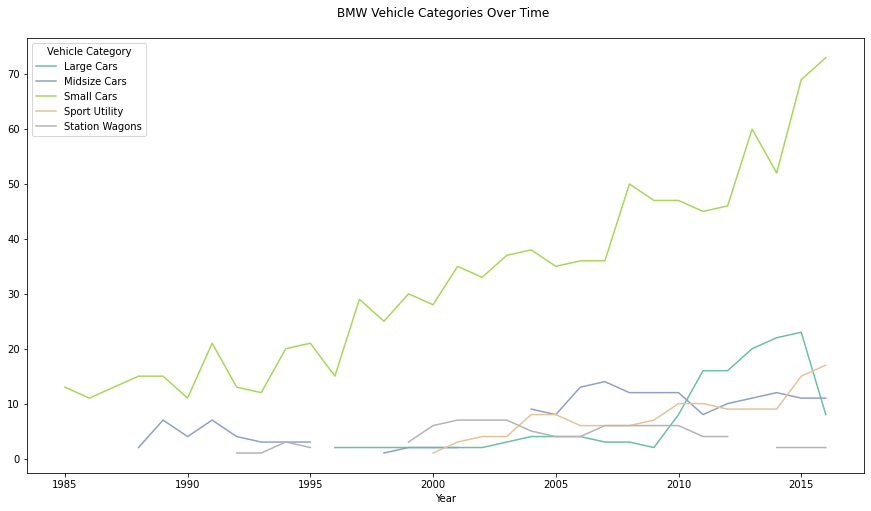

In [48]:
bmw = df_vehicles[df_vehicles['Make'] == 'BMW']

multi_line(bmw, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('BMW Vehicle Categories Over Time \n')

We can see in the chart above that they started off making a reasonable number of small cars, and then seemed to ramp up production of those types of vehicles in the late 90s. We can contrast this with a company like Toyota, who started out making a lot of small cars back in the 1980s and then seemingly made a decision to gradually manufacture less of them over the years, focusing instead on SUVs, pickup trucks, and midsize cars.

Text(0.5, 1.0, 'Toyota Vehicle Categories Over Time \n')

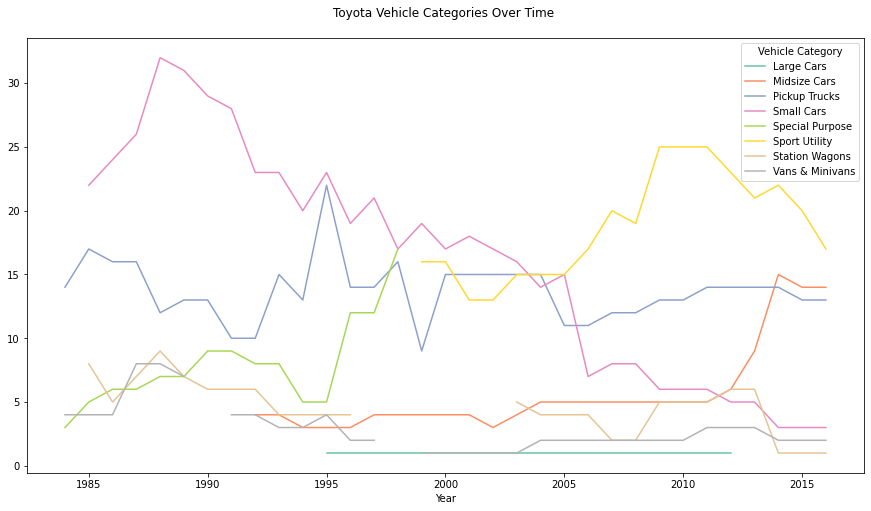

In [49]:
toyota = df_vehicles[df_vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
plt.title('Toyota Vehicle Categories Over Time \n')

#### Examining Relationships Between Variables

The final way we are going to explore our data in this post is by examining the relationships between numerical variables in our data. Doing this will provide us with better insight into which fields are highly correlated, what the nature of those correlations are, what typical combinations of numerical values exist in our data, and which combinations are anomalies.

For looking at relationships between variables, I often like to start with a scatter matrix because it gives me a bird's eye view of the relationships between all the numerical fields in my data set. With just a couple lines of code, we can not only create a scatter matrix, but we can also factor in a layer of color that can represent, for example, the clusters we generated earlier.

In [50]:
df_vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Transmission Type',
       'Vehicle Category', 'Model Type', 'Gas', 'Ethanol', 'Electric',
       'Propane', 'Natural Gas', 'Gas Type', 'Fuel Efficiency', 'Engine Size',
       'Emissions', 'Fuel Cost', 'Cluster Name'],
      dtype='object')

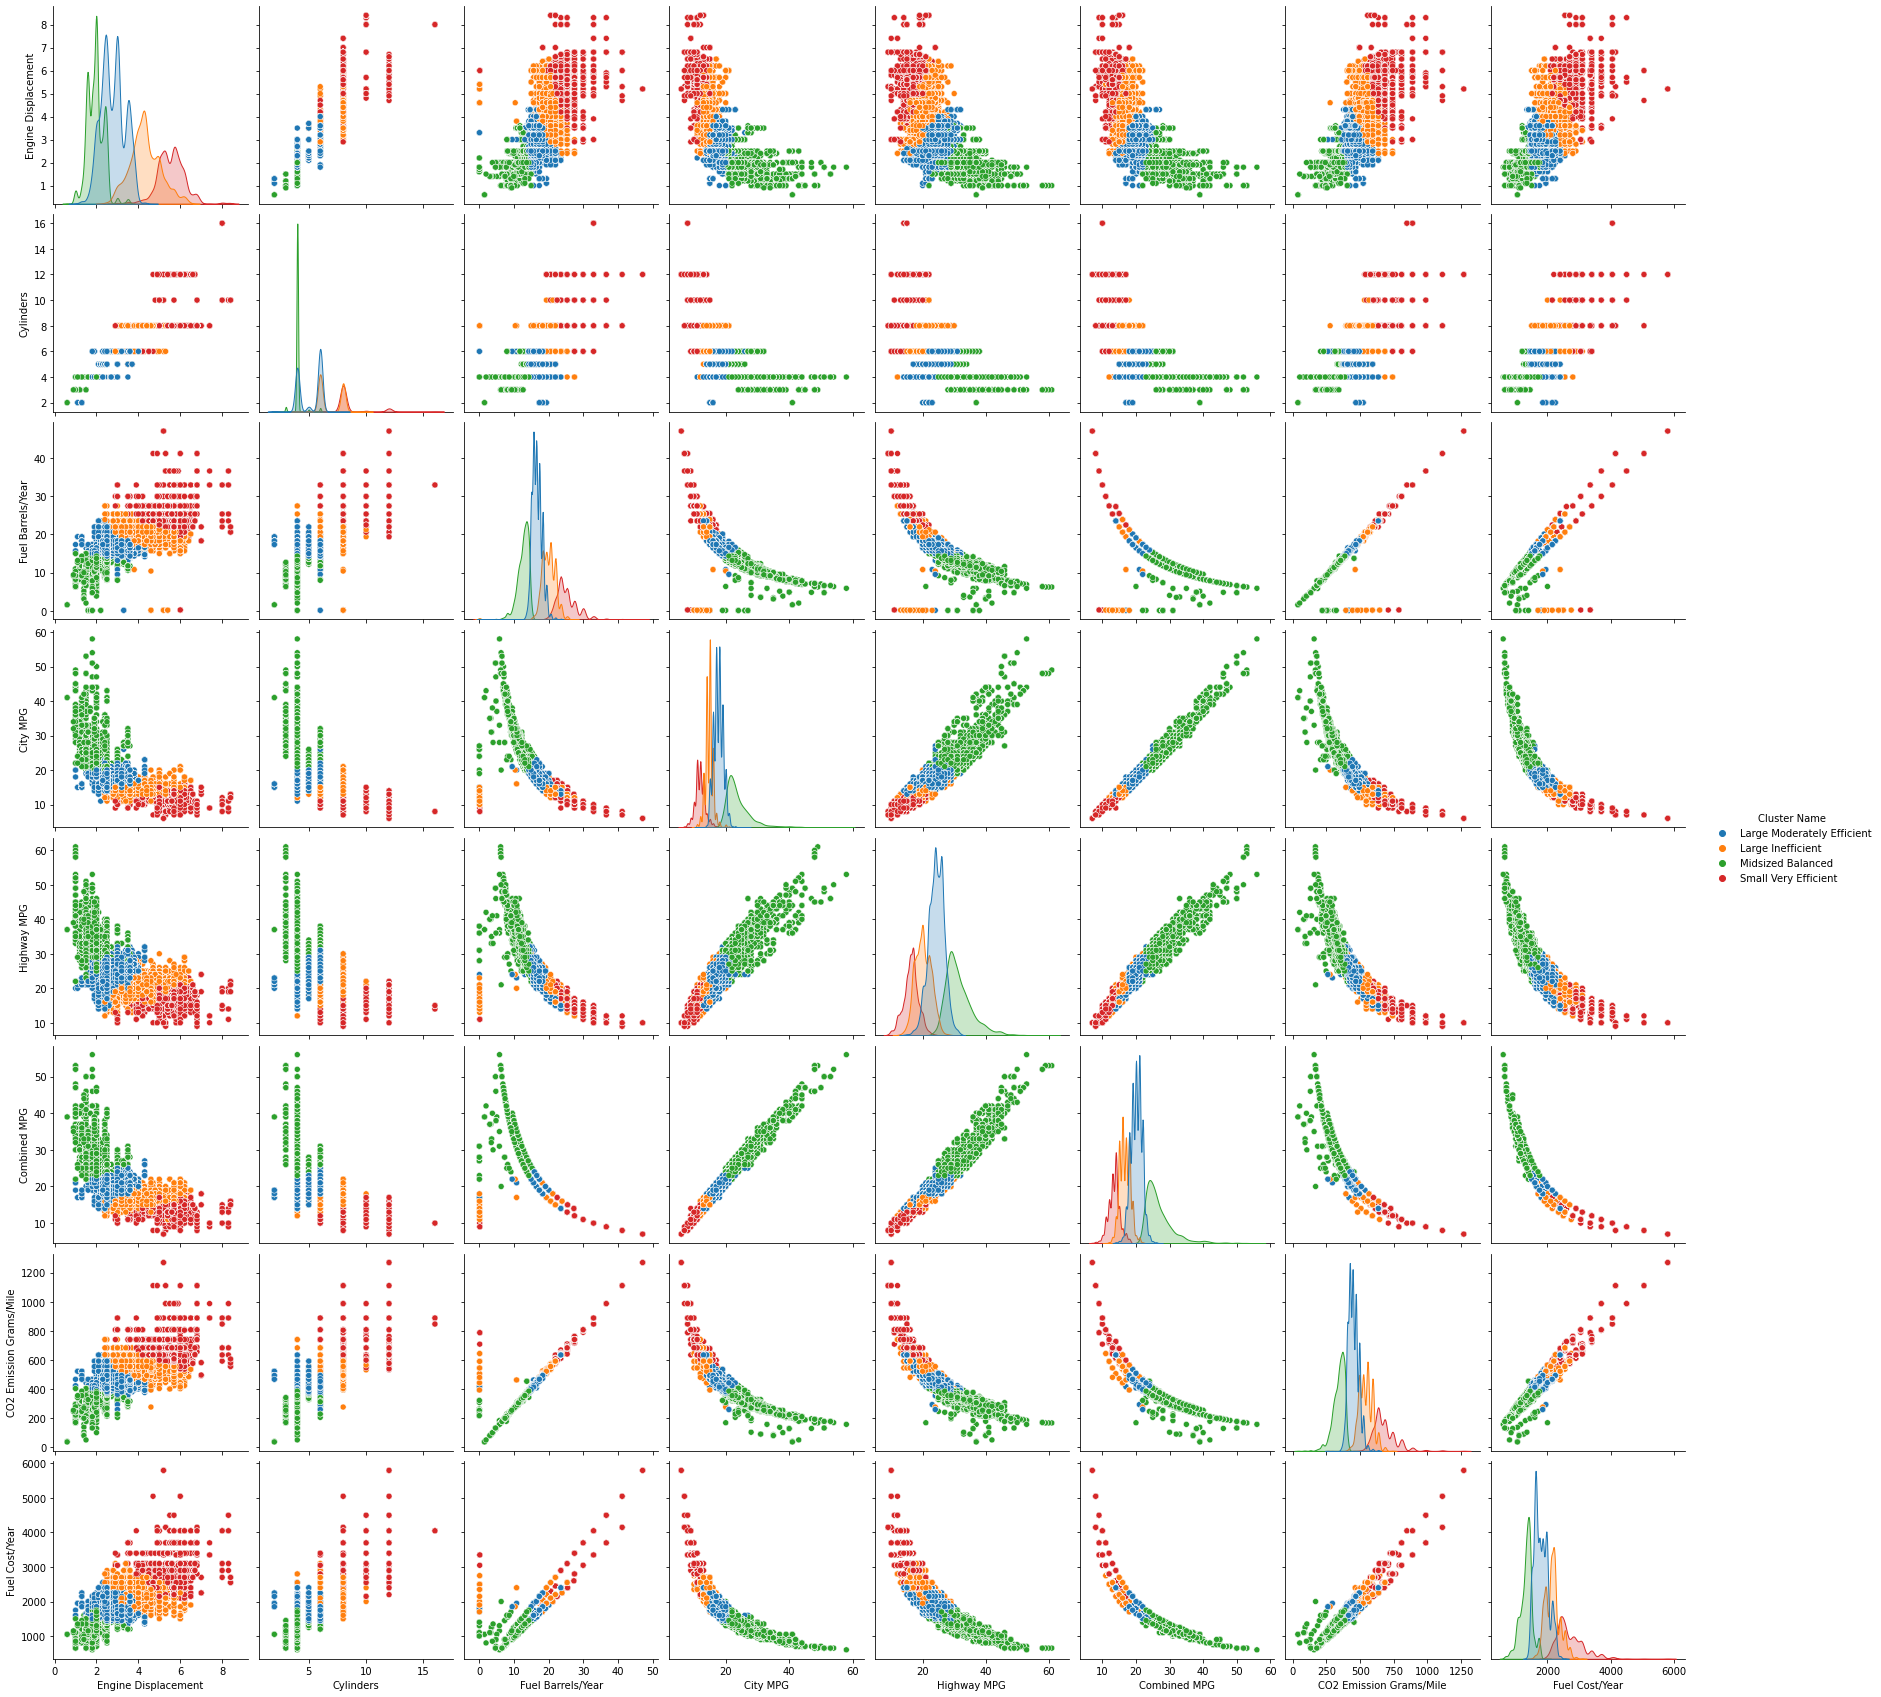

In [51]:
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']

sns.pairplot(df_vehicles[select_columns], hue='Cluster Name', height=3, diag_kws={'bw_method': 0.2})

From here, we can see that there are some strong positive linear relationships in our data, such as the correlations between the MPG fields, and also among the fuel cost, barrels, and CO2 emissions fields. There are also some negative exponential relationships in there as well, particularly between the MPG fields and engine displacement, fuel cost, barrels, and emissions. Additionally, we can also get a sense of the size of our clusters, how they are distributed, and the level of overlap we have between them.

Once we have this high-level overview, we can zoom in on anything that we think looks interesting. For example, let's take a closer look at Engine Displacement plotted against Combined MPG. 

/home/rsouza/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


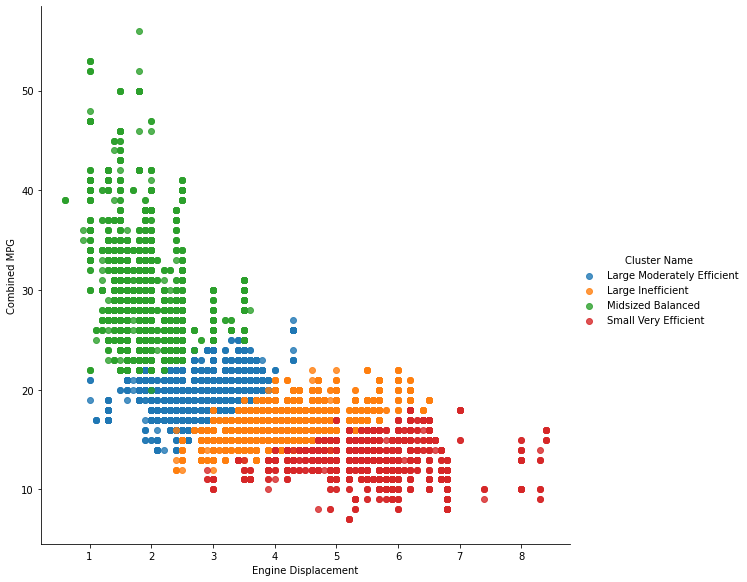

In [52]:
sns.lmplot('Engine Displacement', 
           'Combined MPG', 
           data=df_vehicles, 
           hue='Cluster Name', 
           height=8, 
           fit_reg=False)

In addition to being able to see that there is a negative exponential correlation between these two variables, we can see that our Small Very Efficient cluster resides in the upper left, followed by our Midsized Balanced cluster that looks smaller and more compact than the others. After that, we have our Large Moderately Efficient cluster and finally our Large Inefficient cluster on the bottom right.

We can also see that there are a few red points at the very top left and a few purple points at the very bottom right that we may want to investigate further to get a sense of what types of vehicles we are likely to see at the extremes. Try identifying some of those on your own by filtering the data set like we did earlier in the post. While you're at it, try creating additional scatter plots that zoom in on other numerical field combinations from the scatter matrix above. There are a bunch of other insights to be found in this data set, and all it takes is a little exploration!